# TP3 - Views, Updates and Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in TP2.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [1]:
import sqlite3

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [3]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
Client:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
Producer:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
Production:
  0: NP(NUM)
  1: NV(NUM)
  2: QTE(NUM)
RBA:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
RBB:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
Region:
  0: LIEU(TEXT)
  1: REGION(TEXT)
Sales:
  0: NB(NUM)
  1: NV(NUM)
  2: QTE(NUM)
  3: DATES(NUM)
  4: LIEU(TEXT)
Vins:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)


Again, we will use **`%%sql`** magic for our queries

In [4]:
%load_ext sql
%sql sqlite:///wine.db

'Connected: @wine.db'

Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

Création des tables de Master1

In [5]:
%%sql DROP TABLE IF EXISTS Vins;
DROP TABLE IF EXISTS Producer;
DROP TABLE IF EXISTS Production;

-- Create Vins table
CREATE TABLE Vins AS
SELECT DISTINCT NV, CRU, DEGRE, MILL
FROM MASTER1
WHERE NV IS NOT NULL;

-- Create Producer table
CREATE TABLE Producer AS
SELECT DISTINCT NP, NOM, PRENOM, REGION
FROM MASTER1
WHERE NP IS NOT NULL;

-- Create Production table
CREATE TABLE Production AS
SELECT NP, NV, QTE
FROM MASTER1;

SELECT *
FROM Vins Limit 10;

SELECT *
FROM Producer Limit 10;

SELECT *
FROM Production
WHERE NV IS NOT NULL Limit 10;

 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


NP,NV,QTE
1,1,300
73,1,1
5,2,100
1,3,400
10,4,35
30,5,46
42,6,300
98,7,60
90,8,12
None,9,None


Création des tables de Master2

In [6]:
%%sql DROP TABLE IF EXISTS Vins;
DROP TABLE IF EXISTS Client;
DROP TABLE IF EXISTS Sales;
DROP TABLE IF EXISTS Region;

-- Create Vins table
CREATE TABLE Vins AS
SELECT DISTINCT NV, CRU, DEGRE, MILL
FROM MASTER2
WHERE NV IS NOT NULL;

-- Create Client table
CREATE TABLE Client AS
SELECT DISTINCT NB, NOM, PRENOM, TYPE
FROM MASTER2
WHERE NB IS NOT NULL;

-- Create Sales table
CREATE TABLE Sales AS
SELECT NB, NV, QTE, DATES, LIEU
FROM MASTER2
WHERE NB IS NOT NULL ;

-- Create Lieu table
CREATE TABLE Region AS
SELECT DISTINCT LIEU, REGION
FROM Master2;

SELECT *
FROM Vins Limit 10;

SELECT *
FROM Client Limit 10;

SELECT *
FROM Sales
WHERE NV IS NOT NULL Limit 10;

 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


NB,NV,QTE,DATES,LIEU
2,1,33,1977-11-02,BORDEAUX
44,1,1,2015-10-16,PARIS
45,1,1,1983-12-31,RENNES
48,2,2,1983-12-25,LYON
7,3,6,1978-11-01,NICE
49,3,5,1987-12-24,MERCUREY
8,4,12,1982-11-05,TOULOUSE
44,4,6,2015-10-16,PARIS
50,4,4,1981-06-29,SENS
2,5,50,1984-11-04,MERCUREY


___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [7]:
%%sql 
DROP VIEW IF EXISTS bons_buveurs;

CREATE VIEW  bons_buveurs AS
SELECT DISTINCT NB, NOM, PRENOM, TYPE
FROM Client
WHERE TYPE = 'gros'
OR TYPE = 'moyen';

 * sqlite:///wine.db
Done.
Done.


[]

In [8]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

In [9]:
%%sql 
DROP VIEW IF EXISTS buveurs_asec;

CREATE VIEW  buveurs_asec AS
SELECT DISTINCT NB, NOM, PRENOM, TYPE
FROM Client
WHERE NB NOT IN (SELECT NB FROM Sales
WHERE QTE IS NOT NULL);

 * sqlite:///wine.db
Done.
Done.


[]

In [10]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [11]:
%%sql 
DROP VIEW IF EXISTS buveurs_achats;

CREATE VIEW  buveurs_achats AS
SELECT DISTINCT NB, NOM, PRENOM, TYPE
FROM Client
WHERE NB IN (SELECT NB FROM Sales
WHERE QTE IS NOT NULL);

 * sqlite:///wine.db
Done.
Done.


[]

In [12]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [13]:
%%sql 
DROP VIEW IF EXISTS q83pl;

CREATE VIEW  q83pl AS
SELECT DISTINCT LIEU, CRU, sum(QTE) as QTE_BUE
FROM Sales, Vins
WHERE Sales.NV = Vins.NV
AND Dates LIKE '1983%'
GROUP BY LIEU, CRU;

 * sqlite:///wine.db
Done.
Done.


[]

In [14]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

Non, nous ne pouvons définir la même vue en ordonnant sur QTE car notre vue porte sur la somme des quantités **"QTE_BUE"** sur l'année 1983 par lieu et par CRU et non sur "QTE".

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [15]:
%%sql DROP TABLE IF EXISTS RBB;;

-- Create RBB table
CREATE TABLE RBB AS
SELECT *
FROM bons_buveurs;

 * sqlite:///wine.db
Done.
0 rows affected.
Done.


[]

In [16]:
# Test
%sql SELECT * FROM RBB ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [17]:
%%sql SELECT Client.NB, Client.TYPE, sum(Sales.QTE) as somme
FROM Client, Sales
WHERE Client.NB = Sales.NB
AND Client.TYPE != 'gros'
GROUP BY Sales.NB
HAVING somme > 100;

 * sqlite:///wine.db
Done.


NB,TYPE,somme
2,moyen,583
5,petit,113
9,petit,140
44,petit,171


Update instances

In [18]:
%%sql 
UPDATE Client
SET TYPE = 'gros'
WHERE Client.NB IN (SELECT Client.NB
FROM Client, Sales
WHERE Client.NB = Sales.NB
AND Client.TYPE != 'gros'
GROUP BY Sales.NB
HAVING sum(Sales.QTE) > 100);

 * sqlite:///wine.db
4 rows affected.


[]

#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

In [19]:
%sql SELECT * FROM bons_buveurs ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,gros
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen


In [20]:
%sql SELECT * FROM RBB ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


### Answer: 
- **On constate que la vue "bons_buveurs" a été mise à jour suite à notre "UPDATE".**

- **Par contre la table "RBB" n'a pas été mise à jour.**

Ceci s'explique par le fait que la vue **"bons_buveurs"** ait été créée à partir de la table **"Client"**. Toute mise à jour ou insertion d'une donnée dans la table **"Client"** remplissant les conditions de création de la vue **"bons_buveurs"** entraînera une mise à jour automatique de cette dernière.

Par contre la table **"RBB"** ayant été créée à partir de la vue n'a pas été mise à jour car une table ne possède pas le s mêmes propriétés qu'une vue.

#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [21]:
%%sql DROP TABLE IF EXISTS RBA;;

-- Create RBB table
CREATE TABLE RBA AS
SELECT *
FROM buveurs_asec;

 * sqlite:///wine.db
Done.
0 rows affected.
Done.


[]

In [22]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [23]:
%%sql INSERT INTO RBA(NB, NOM, PRENOM, TYPE)
VALUES(101, 'Fangue', 'Parfait', 'petit');

 * sqlite:///wine.db
1 rows affected.


[]

In [24]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

In [25]:
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [26]:
%sql SELECT * FROM buveurs_asec

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


Answer: 
- **On constate que la vue "buveurs_asec" n'a pas été mise à jour suite à notre "INSERT" dans la table RBA qui elle est à jour**. Ceci s'explique par le fait que la vue n'ait pas été créée à partir de la table **"RBA"** mais plutôt à partir de la table **"Client"**

___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

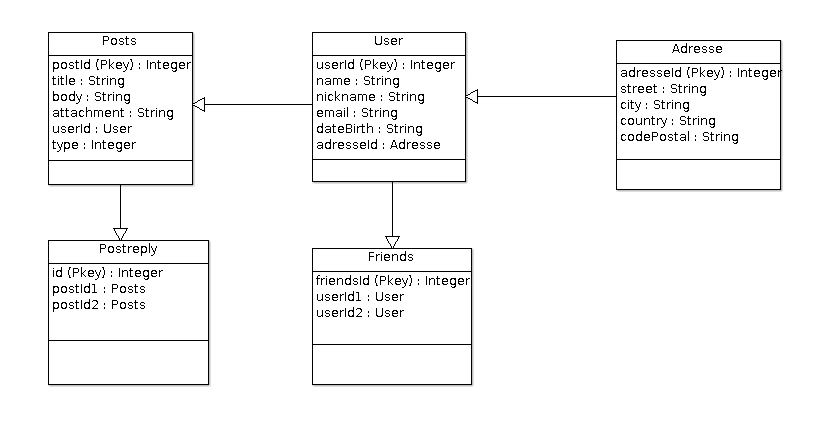

Pour la création du schéma d'un réseau social, j'ai opté pour la création de 5 tables:
- la table "User" qui contient tous les éléments d'identification d'un utilisateur. Afin d'éviter la répétition d'adresses pour les uilisateurs résidants au même endroit, on a externalisé la table adresse et renseigné la clé primaire de la table "Adresse" (adresseid) en tant qiue clé étrangère de la table "User".

- La table "Friends" permet de lier les users étant amis.

- La Table "Posts" permet de référencer toutes les publications (par user) qui peuvent être des "posts" ou des "replies". Les posts et les replies sont différenciés par la colonne "type". Elle vaut "0" si la publication est de type "post" et "1" s'il s'agit d'une reply. Les replies rattachés à un post sont renseignés dans la table "Postreply". 

#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.

On considère dans l' exemple ci-dessous que l'identifiant **(userId) de la personne connectée est 10.**

In [27]:
%%sql 
DROP VIEW IF EXISTS display_posts;

CREATE VIEW  display_posts AS
SELECT Posts.title, Posts.body, Posts.attachment, Posts.type, User.name
FROM Posts, User
WHERE Posts.userId = User.userId
AND Posts.userId IN (SELECT userId2
FROM Friends 
WHERE userId1 = 10 
OR userId2 = 10);

 * sqlite:///wine.db
Done.
Done.


[]

- Pour afficher les posts en premier, on pourra se baser sur la date de publication ou de mise à jour de la publication. On affichera prioritairement les publications les plus récentes.


- Pour mieux gérer ce type d'information, nous devons ajouter un champ de type **'TIMESTAMP'** dans la table "Posts". Ce type de champ est un datetime qui permet de connaitre la date et l heure de la dernière modification et ou insertion d'un élément.


